# Pandas for Data Analysis

In this third workshop we will focus on using the pandas library for data wrangling and analysis.

In [2]:
%%HTML
<div style="text-align: center">
<iframe width="560" height="315" src="https://youtube.com/embed/HjF98JryayQ" frameborder="0" allowfullscreen></iframe>

</div>

## Importing pandas

Fire up a Jupyter Notebook. In order to read in and then wrangle our data, the first thing we need to do once we've opened a new script in our `data_science` environment is to import the pandas library. You can read more about the library [here](https://pandas.pydata.org/).

In [3]:
import pandas as pd

We'll start by reading in some data using the pandas function `pd.read_csv`. The data are available via the http address below. This is the same data file that we looked at in the R workshop on ANOVA. 

24 participants responded to a word that was either common (i.e., high lexical frequency) or rare (i.e., low lexical frequency). This is our IV and is coded as ‘high’ vs. low’. Our DV is reaction time and is coded as ‘RT’. Subject number is coded as ‘Subject’. We want to know whether there is a difference between conditions (and if so, where that difference lies). 

We need to visualise the data, generate descriptives, and run the appropriate ANOVA to determine whether our independent variable (Condition) has an influence on our dependent variable (RT).

In [4]:
anova_data = pd.read_csv("https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_data1.csv")

In [5]:
anova_data

,Subject,Condition,RT
0,1,low,1103
1,2,low,1170
2,3,low,1225
3,4,low,1084
4,5,low,1219
5,6,low,1203
6,7,low,1208
7,8,low,1311
8,9,low,1078
9,10,low,1326


## Visualising Our Data

In order to visualise the data we need to use the `matplotlib` library. This library contains a range of tools for visualising data. You can read more about it [here](https://matplotlib.org/stable/). 

In [6]:
import matplotlib.pyplot as plt

In the code below we used the `plot` function from `pyplot`. We build our final plot layer be layer (similar to how we do things in `R` with `ggplot2`. We define our plot initially in terms of what's on the x-axis, what's on the y-axis, and then what marker we want to use - which in this case is blue circles.

After this, we then add an x-axis label, a y-axis label, and a title. We also set the margins to make the plot like nice.

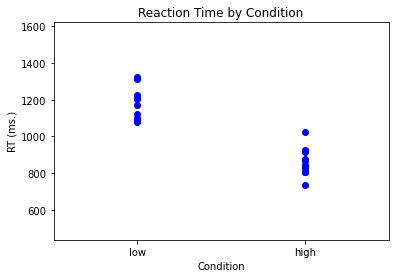

In [48]:
plt.plot(anova_data['Condition'], anova_data['RT'], 'bo')
plt.xlabel('Condition')
plt.ylabel('RT (ms.)')
plt.title('Reaction Time by Condition')
plt.margins(.5, .5)

Let's now work out some descriptive statistics using `pandas`  functions. We'll use the `groupby` function to group our RT data by condiiton, and we'll map this onto a new variable I'm calling `grouped`.

In [111]:
grouped = anova_data.groupby(['Condition'])

We can then generate some descriptives about this grouped data frame. We can use the `count` function to work out how many observations we have for each of our two conditions.

In [118]:
grouped.count()

,Subject,RT
Condition,,
high,12,12
low,12,12


If we wanted just to output the count for our `RT` column we could do the following.

In [119]:
grouped.count()['RT']

Condition
high    12
low     12
Name: RT, dtype: int64

From the above we can see we have 12 observations in each condition, and our variable RT is type integer. We can use other `pandas` functions such as `mean()` and `std()` in a similar way.

In [114]:
grouped.mean()['RT']

Condition
high     864.666667
low     1178.166667
Name: RT, dtype: float64

In [115]:
grouped.std()['RT']

Condition
high    74.722923
low     85.708633
Name: RT, dtype: float64

We can map our means onto a new variable I'm calling `my_means` and then we can plot these means as a bar graph.

Text(0.5, 1.0, 'Reaction Time by Condition')

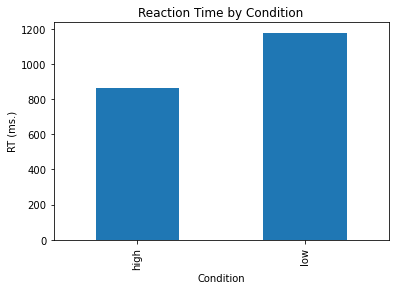

In [117]:
my_means = grouped.mean()['RT']
my_means.plot(kind='bar')
plt.ylabel('RT (ms.)')
plt.title('Reaction Time by Condition')

## One-Way ANOVA

To run a between participants one-way ANOVA to determine whether there is a difference between our two conditions we're going to use the `stats` module from the `scipy` library. We import it as follows... 

In [20]:
from scipy import stats

We are now going to subset our `anova_data` data frame. We are going to do that by using a logical condition `[anova_data['Condition']=='high']`. If we were to run the following we'd see we have the subset of the data frame where Condition is equal to 'high'.

In [42]:
anova_data[anova_data['Condition']=='high']

,Subject,Condition,RT
12,13,high,828
13,14,high,925
14,15,high,915
15,16,high,869
16,17,high,804
17,18,high,835
18,19,high,1022
19,20,high,919
20,21,high,842
21,22,high,805


But what we really want is to just select the `RT` column.

In [44]:
anova_data[anova_data['Condition']=='high']['RT']

12     828
13     925
14     915
15     869
16     804
17     835
18    1022
19     919
20     842
21     805
22     879
23     733
Name: RT, dtype: int64

By builing on the above we can create two new variables, one corresponding to the data for the `high` condition group and the other for the `low` condition group.

In [45]:
high_group = anova_data[anova_data['Condition']=='high']['RT']
low_group = anova_data[anova_data['Condition']=='low']['RT']

We are now in a position to run a 1-way ANOVA. We use the`f_oneway` function in the `stats` module to do this. The two parameters that it needs are the two groups that we are wanting to compare to test the null hypothesis that the two groups have the same population mean. If we had three groups, we would just pass the three groups to the function.  

In [46]:
stats.f_oneway(high_group, low_group)

F_onewayResult(statistic=91.2168592809951, pvalue=2.767399319989348e-09)

Remember, the p-value is the probability of obtaining test results at least as extreme as the results observed, under the assumption that the null hypothesis is true. Note, the output above gives us the F-value and the p-value but not the degrees of freedom. As we just have two groups, we could also run an independent sample t-test using the `ttest_ind` function from `stats`.

In [57]:
stats.ttest_ind(group1, group2)

Ttest_indResult(statistic=-9.550751765227444, pvalue=2.7673993199893327e-09)

Note that the p-value is the same as we found with our ANOVA - and if we square the t-value we get the F-value.

In [58]:
9.550751765227444 * 9.550751765227444

91.21685928099514

If we had three groups in our study, we could run the 1-way ANOVA as we did above and then if that it significant run multiple t-tests with a manually adjusted alpha level (e.g., using the Bonferroni correction). One of the limitations with using the `stats` module is that degrees of freedom are not reported, nor is information about the residuals. In order to generate an ANOVA table more like the type we're familiar with we are going to use the statsmodels package. This isn't a package we yet have in our `data_science` environment so we need to install it using the Terminal shell.  

Go into your shell and activate the `data_science` environment using `conda activate data_science`. You then need to install the library using `conda install statsmodels`. Once that library is installed, go back to your Jupyer Notebook and you should be able to import the statsmodels library and the ols modules (for ordinary least squares models) as follows.

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

We define our model below using syntact not too disimilar from how we did the same in R. We are going to fit an OLS model to our data where our outcome variable `RT` is predicted by `Condition`. We then present the results in an ANOVA table using Type 3 Sums of Squares. This is much closer to the level of detail that we need.

In [82]:
model = ols('RT ~ Condition', data=anova_data).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,8.971781e+06,1.0,1387.801825,2.263783e-21
Condition,5.896935e+05,1.0,91.216859,2.767399e-09
Residual,1.422243e+05,22.0,NaN,NaN


In [ ]:
Add challenge here using 1 factor with 3 levels:
    
    anova_data = pd.read_csv("https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_data2.csv")

## Factorial ANOVA

In many types of experiments we are interested in how two (or more) experimental factors interact with each other. For example, in a typical priming paradigm experiment we might be interested in whether people's response times to a positively or negatively valenced target stimulus are influenced by whether it was preceded by a positively or negatively valenced prime. 

In [83]:
factorial_anova_data = pd.read_csv("https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_data3.csv")

In [84]:
factorial_anova_data

,Subject,Size,Colour,RT
0,1,Small,Colour,855
1,2,Small,Colour,956
2,3,Small,Colour,1038
3,4,Small,Colour,827
4,5,Small,Colour,1029
...,...,...,...,...
91,20,Small,B&W,1271
92,21,Small,B&W,1315
93,22,Small,B&W,1537
94,23,Small,B&W,1349


In [120]:
grouped = factorial_anova_data.groupby(['Size', 'Colour'])
grouped.mean()['RT']

Size   Colour
Large  B&W       1228.041667
       Colour     593.333333
Small  B&W       1420.166667
       Colour     957.416667
Name: RT, dtype: float64